In [1]:
import pickle, math
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns

import re, nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

from wordcloud import WordCloud
from sklearn.feature_extraction import text

%matplotlib inline
%config InlineBackend.figure_formats = ["svg"]
plt.style.use("seaborn")
pd.options.display.max_colwidth = 120

### Read in df containing books with English summary:

In [2]:
df = pd.read_pickle("data/bks_with_eng_summary.pkl")

In [3]:
df.shape

(3043, 10)

In [4]:
len(df[df.duplicated(subset=["title", "author"])])

26

In [5]:
df.drop_duplicates(subset=["title", "author"], inplace=True)

In [6]:
df.shape

(3017, 10)

In [7]:
df.head()

title  \
0                                        The Diary of a Young Girl   
1                                                            Night   
2                                                   Being and Time   
3                                                        Hiroshima   
4  Into Thin Air: A Personal Account of the Mount Everest Disaster   

             author  rating  num_rating  review page               year  \
0        Anne Frank    4.16     2887098   30439  283          July 1993   
1       Elie Wiesel    4.34     1008920   30066  115  January 16th 2006   
2  Martin Heidegger    4.03       20738     613  589    August 1st 1962   
3       John Hersey    3.99       63589    3332  152     March 4th 1989   
4      Jon Krakauer    4.19      411855   14209  368  October 19th 1999   

                        publisher  \
0                       by Bantam   
1                  by Hill & Wang   
2  by Harper & Row (NYC/Evanston)   
3                      by Vintage   
4                 by Anchor Books   

                                                                                                                   summary  \
0  Discovered in the attic in which she spent the last years of her life, Anne Frank’s remarkable diary has become a wo...   
1  Born in the town of Sighet, Transylvania, Elie Wiesel was a teenager when he and his family were taken from their ho...   
2  One of the most important philosophical works of our time, a work that has had tremendous influence on philosophy, l...   
3  On August 6, 1945, Hiroshima was destroyed by the first atom bomb ever dropped on a city. This book, John Hersey's j...   
4  A bank of clouds was assembling on the not-so-distant horizon, but journalist-mountaineer Jon Krakauer, standing on ...   

  language  
0       en  
1       en  
2       en  
3       en  
4       en

In [8]:
# double check for duplicates
df.groupby(["title", "author"]).rating.count().sort_values(ascending=False)

title                                                                              author               
"A Problem from Hell": America and the Age of Genocide                             Samantha Power           1
The Blood Red Sea                                                                  Ron Faust                1
The Big Short: Inside the Doomsday Machine                                         Michael   Lewis          1
The Biographical Dictionary of Literary Failure                                    C.D.  Rose               1
The Birth of Britain                                                               Winston S. Churchill     1
                                                                                                           ..
I Kissed Dating Goodbye: A New Attitude Toward Relationships and Romance           Joshua Harris            1
I Know Why the Caged Bird Sings                                                    Maya Angelou             1
I Must Say: My 

In [9]:
# replace empty entries under page with np.nan
df["page"].replace("", np.nan, inplace=True)

In [11]:
#df.to_pickle("data/bks_cleaned.pkl")

In [10]:
df.describe()

rating    num_rating        review         page
count  3017.000000  3.017000e+03   3017.000000  2888.000000
mean      4.071727  2.927708e+04   1696.160093   316.972992
std       0.398325  1.059195e+05   5177.228238   201.446527
min       0.000000  0.000000e+00      0.000000     0.000000
25%       3.870000  7.400000e+01     12.000000   220.000000
50%       4.060000  1.200000e+03    117.000000   294.000000
75%       4.250000  1.322500e+04   1013.000000   380.000000
max       5.000000  2.887098e+06  76596.000000  5059.000000

In [11]:
# wonder which book has 2.9milliions rating
mask = (df.num_rating == 2887098)
df[mask]

title      author  rating  num_rating  review   page  \
0  The Diary of a Young Girl  Anne Frank    4.16     2887098   30439  283.0   

        year  publisher  \
0  July 1993  by Bantam   

                                                                                                                   summary  \
0  Discovered in the attic in which she spent the last years of her life, Anne Frank’s remarkable diary has become a wo...   

  language  
0       en

In [12]:
bins = [-0.01, 3, 3.5, 4, 4.5, 5]
groups = ["<= 3", "3-3.5", "3.5-4", "4-4.5", "4.5-5"]
by_rating = pd.DataFrame(pd.cut(df["rating"], bins=bins, right=True, labels=groups).value_counts().sort_index())

In [13]:
by_rating

rating
<= 3       24
3-3.5     120
3.5-4    1150
4-4.5    1419
4.5-5     304

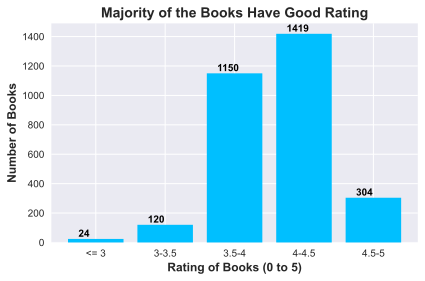

In [14]:
plt.figure(figsize = (6, 4))
plt.bar(by_rating.index, by_rating.rating, color="deepskyblue")

for ind, val in enumerate(by_rating.rating):
    plt.text(ind - 0.25, val + 15, str(val), color="black", weight='bold')
    
plt.title("Majority of the Books Have Good Rating", fontsize= 14, weight="bold")
plt.ylabel("Number of Books", fontsize=12, weight="bold")
plt.xlabel("Rating of Books (0 to 5)", fontsize=12, weight="bold")
plt.tight_layout();
#plt.savefig("number_books_by_rating.png");

In [15]:
# there are authors that could have more than 10 books...o.O
df["author"].value_counts().head()

Bill Bryson     13
Ann Coulter     12
Hugh Ross       11
Karl Wiggins    11
NOT A BOOK      11
Name: author, dtype: int64

### Move on to process book summary:

In [ ]:
# df = pd.read_pickle("data/bks_cleaned.pkl")

In [ ]:
# sample = np.random.choice(range(df.shape[0]), size=1, replace=False)
# sample

In [ ]:
# for i in df.iloc[sample]["summary"]:
#     print("Book summary:", i, "\n")

In [ ]:
# text = df.iloc[2211, -2]
# text = text.lower()
# text = re.sub("['’]", "", text)
# text = re.sub("\n", " ", text)
# text = re.sub("\w*\d\w*", "", text)
# text = re.sub("[^a-z\s]", " ", text)
# print("Book summary:", text)

In [67]:
# define function to convert all text to lower case, remove punctuation, remove words with number
def clean_text(text):
    """Cleans text by making text lowercase, removing words containing numbers, and extracting only words.
       Parameters: strings of text
       Returns: cleaned text
    """
    text = text.lower()
    text = re.sub("['’]", "", text)
    text = re.sub("\n", " ", text)
    text = re.sub("\w*\d\w*", "", text)
    text = re.sub("[^a-z\s]", " ", text)

    return text    

In [68]:
# clean book summary and add it back to the data frame as clean_summary
df["clean_summary"] = df["summary"].apply(clean_text)

### Lemmatization:



In [69]:
lemmatizer = WordNetLemmatizer()

In [70]:
# tokenize the clean summary, apply lemmatization, and join the words back together
df["clean_summary"] = df["clean_summary"].apply(word_tokenize)

df["clean_summary"] = df["clean_summary"].apply(lambda x: [lemmatizer.lemmatize(i) for i in x])
df["clean_summary"] = df["clean_summary"].apply(lambda x: " ".join(x))
df.head()

title  \
0                                        The Diary of a Young Girl   
1                                                            Night   
2                                                   Being and Time   
3                                                        Hiroshima   
4  Into Thin Air: A Personal Account of the Mount Everest Disaster   

             author  rating  num_rating  review   page               year  \
0        Anne Frank    4.16     2887098   30439  283.0          July 1993   
1       Elie Wiesel    4.34     1008920   30066  115.0  January 16th 2006   
2  Martin Heidegger    4.03       20738     613  589.0    August 1st 1962   
3       John Hersey    3.99       63589    3332  152.0     March 4th 1989   
4      Jon Krakauer    4.19      411855   14209  368.0  October 19th 1999   

                        publisher  \
0                       by Bantam   
1                  by Hill & Wang   
2  by Harper & Row (NYC/Evanston)   
3                      by Vintage   
4                 by Anchor Books   

                                                                                                                   summary  \
0  Discovered in the attic in which she spent the last years of her life, Anne Frank’s remarkable diary has become a wo...   
1  Born in the town of Sighet, Transylvania, Elie Wiesel was a teenager when he and his family were taken from their ho...   
2  One of the most important philosophical works of our time, a work that has had tremendous influence on philosophy, l...   
3  On August 6, 1945, Hiroshima was destroyed by the first atom bomb ever dropped on a city. This book, John Hersey's j...   
4  A bank of clouds was assembling on the not-so-distant horizon, but journalist-mountaineer Jon Krakauer, standing on ...   

  language  \
0       en   
1       en   
2       en   
3       en   
4       en   

                                                                                                             clean_summary  
0  discovered in the attic in which she spent the last year of her life anne frank remarkable diary ha become a world c...  
1  born in the town of sighet transylvania elie wiesel wa a teenager when he and his family were taken from their home ...  
2  one of the most important philosophical work of our time a work that ha had tremendous influence on philosophy liter...  
3  on august hiroshima wa destroyed by the first atom bomb ever dropped on a city this book john herseys journalistic m...  
4  a bank of cloud wa assembling on the not so distant horizon but journalist mountaineer jon krakauer standing on the ...

In [72]:
# save data
df.to_pickle("data/clean_summary.pkl")

### Sentiment analysis on book summary:

In [73]:
df = pd.read_pickle("data/clean_summary.pkl")

In [74]:
df["polarity"] = df["summary"].apply(lambda x: TextBlob(x).sentiment.polarity)

In [75]:
df["subjectivity"] = df["summary"].apply(lambda x: TextBlob(x).sentiment.subjectivity)

In [76]:
bins = [-0.01, 3, 3.5, 4, 4.5, 5]
groups = ["<= 3", "3-3.5", "3.5-4", "4-4.5", "4.5-5"]
df["cat_rating"] = pd.cut(df["rating"], bins=bins, right=True, labels=groups)

In [77]:
# wonder if there are differences in polarity and subjectivity for books belong to different rating categories
# rating <= 3 seems to be different from the other categories, but only a few books in the particular category
df.groupby(["cat_rating"])[["polarity", "subjectivity"]].mean()

polarity  subjectivity
cat_rating                        
<= 3        0.122959      0.447854
3-3.5       0.148307      0.485458
3.5-4       0.146332      0.487725
4-4.5       0.145725      0.493044
4.5-5       0.150848      0.479369

### Curious what the polarity is for When Breath Becomes Air:

In [78]:
mask = (df.author == "Paul Kalanithi")#|(df.author == "Atul Gawande")
df[mask]

title          author  rating  num_rating  review  \
114  When Breath Becomes Air  Paul Kalanithi    4.36      447642   34968   

      page               year        publisher  \
114  208.0  January 19th 2016  by Random House   

                                                                                                                     summary  \
114  For readers of Atul Gawande, Andrew Solomon, and Anne Lamott, a profoundly moving, exquisitely observed memoir by a ...   

    language  \
114       en   

                                                                                                               clean_summary  \
114  for reader of atul gawande andrew solomon and anne lamott a profoundly moving exquisitely observed memoir by a young...   

     polarity  subjectivity cat_rating  
114  0.270356      0.535059      4-4.5

In [79]:
# Split the summary of When Breath Becomes Air into 6 parts and see how polarity changes
summary = df.loc[mask,"summary"].values[0]

size = math.floor(len(summary)/5)
start = np.arange(0, len(summary), size)

splits = []
for piece in range(5):
    splits.append(summary[start[piece]:start[piece] + size])
    
splits

["For readers of Atul Gawande, Andrew Solomon, and Anne Lamott, a profoundly moving, exquisitely observed memoir by a young neurosurgeon faced with a terminal cancer diagnosis who attempts to answer the question 'What makes a life worth living?'At the age of thirty-six, on the verge of completing a decade's worth of training as a neurosurgeon, Paul Kalanithi was diagn",
 'osed with stage IV lung cancer. One day he was a doctor treating the dying, and the next he was a patient struggling to live. And just like that, the future he and his wife had imagined evaporated. When Breath Becomes Air chronicles Kalanithi\'s transformation from a naïve medical student "possessed," as he wrote, "by the question of what, given that all organisms di',
 'e, makes a virtuous and meaningful life" into a neurosurgeon at Stanford working in the brain, the most critical place for human identity, and finally into a patient and new father confronting his own mortality. What makes life worth living in the fac

In [80]:
summary_polarity = []
for piece in splits:
    summary_polarity.append(TextBlob(piece).sentiment.polarity)
summary_polarity

[0.3566666666666667,
 0.03409090909090909,
 0.22626262626262625,
 0.17392676767676765,
 0.7666666666666666]

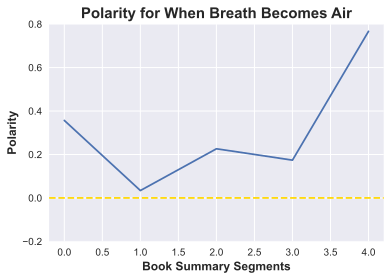

In [81]:
plt.rcParams["figure.figsize"] = [6, 4]
plt.rcParams["figure.dpi"] = 300

plt.plot(summary_polarity)
plt.title("Polarity for When Breath Becomes Air", fontsize=15, weight="bold")
plt.ylim(ymin=-0.2, ymax = 0.8)
plt.axhline(y = 0, color="gold", linestyle="--")
plt.xlabel("Book Summary Segments", fontsize=12, weight="bold")
plt.ylabel("Polarity", fontsize=12, weight="bold");

### Sentiment with vader sentiment:

In [82]:
analyzer = SentimentIntensityAnalyzer()

In [83]:
sentiment = []
for summary in df.summary:
    sentiment.append(analyzer.polarity_scores(summary))

In [84]:
df_sent = df[["title", "author", "cat_rating", "polarity"]]

In [85]:
sent_compare = pd.concat([df_sent, pd.DataFrame(sentiment)], axis=1)

In [86]:
sent_compare.head()

title  \
0                                        The Diary of a Young Girl   
1                                                            Night   
2                                                   Being and Time   
3                                                        Hiroshima   
4  Into Thin Air: A Personal Account of the Mount Everest Disaster   

             author cat_rating  polarity    neg    neu    pos  compound  
0        Anne Frank      4-4.5  0.165476  0.175  0.679  0.146   -0.8402  
1       Elie Wiesel      4-4.5  0.116883  0.180  0.788  0.032   -0.9684  
2  Martin Heidegger      4-4.5  0.288889  0.000  0.852  0.148    0.6590  
3       John Hersey      3.5-4  0.197254  0.055  0.801  0.144    0.8853  
4      Jon Krakauer      4-4.5 -0.159259  0.201  0.799  0.000   -0.9559

In [87]:
# wonder if there are differences in polarities for books belong to different rating categories
# rating <= 3 seems to be different from the other categories, but only a few books in the particular category
sent_compare.groupby(["cat_rating"])[["polarity", "compound"]].mean()

polarity  compound
cat_rating                    
<= 3        0.122959  0.551917
3-3.5       0.148307  0.457961
3.5-4       0.146332  0.361651
4-4.5       0.145725  0.385750
4.5-5       0.150848  0.274331

### Word Cloud:



In [88]:
# put all summaries from same cat_rating together
by_rating = pd.DataFrame(df.groupby("cat_rating")["clean_summary"].apply(list).reset_index())
by_rating["clean_summary"] = by_rating["clean_summary"].apply(lambda x: " ".join(x))

In [89]:
by_rating

cat_rating  \
0       <= 3   
1      3-3.5   
2      3.5-4   
3      4-4.5   
4      4.5-5   

                                                                                                             clean_summary  
0  february started out a an average day at marjory stoneman douglas high but the parkland florida school and america a...  
1  when germany invaded poland stuka bomber devastated warsaw and the city zoo along with it with most of their animal ...  
2  on august hiroshima wa destroyed by the first atom bomb ever dropped on a city this book john herseys journalistic m...  
3  discovered in the attic in which she spent the last year of her life anne frank remarkable diary ha become a world c...  
4  combined for the first time here are maus i a survivor tale and maus ii the complete story of vladek spiegelman and ...

In [ ]:
# print(text.ENGLISH_STOP_WORDS)

In [93]:
# adding more stop words to the list of stop words
# note: wa, ha, and u come from lemmatization of was, has, and us
more_sws = ["that", "this", "a", "the", "from", "not",
            "at", "to", "of", "for", "ha", "what",
            "also", "or", "more", "in", "he", "wa",
            "and", "by", "is", "after", "are", "thing",
            "wasnt", "just", "doe", "u", "did", "book"]
stop_words = text.ENGLISH_STOP_WORDS.union(more_sws)

In [94]:
word_cloud = WordCloud(width=800, height=500,
                       stopwords=stop_words, background_color="white", 
                       colormap="Dark2", max_words=100, 
                       max_font_size=150, random_state=11)

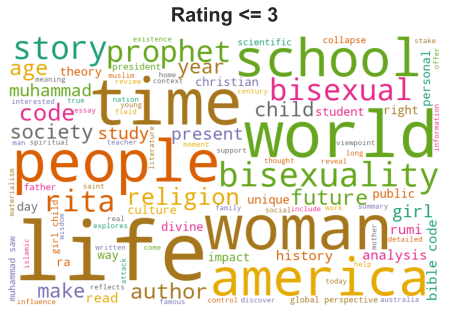

In [95]:
plt.rcParams["figure.figsize"] = [8, 5]
plt.rcParams["figure.dpi"] = 300

word_cloud.generate(by_rating.clean_summary[0])
plt.imshow(word_cloud, interpolation="bilinear")
plt.axis("off");
plt.title("Rating <= 3", weight="bold", fontsize=20, y=1.03)
plt.show();

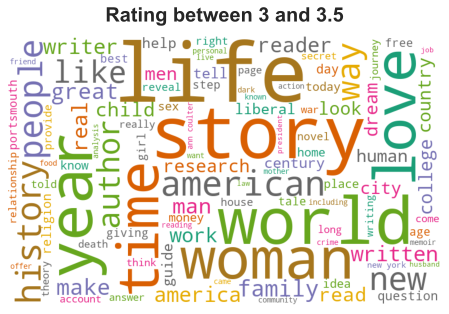

In [96]:
plt.rcParams["figure.figsize"] = [8, 5]
plt.rcParams["figure.dpi"] = 300

word_cloud.generate(by_rating.clean_summary[1])
plt.imshow(word_cloud, interpolation="bilinear")
plt.axis("off");
plt.title("Rating between 3 and 3.5", weight="bold", fontsize=20, y=1.03)
plt.show();

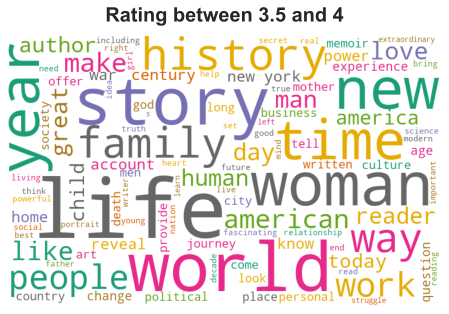

In [97]:
plt.rcParams["figure.figsize"] = [8, 5]
plt.rcParams["figure.dpi"] = 300

word_cloud.generate(by_rating.clean_summary[2])
plt.imshow(word_cloud, interpolation="bilinear")
plt.axis("off");
plt.title("Rating between 3.5 and 4", weight="bold", fontsize=20, y=1.03)
plt.show();

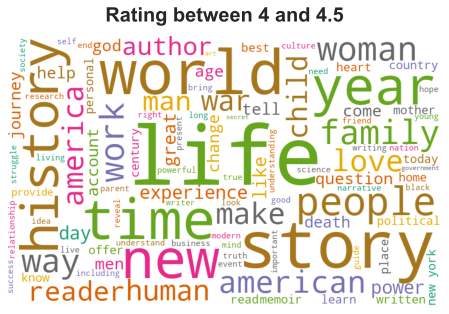

In [98]:
plt.rcParams["figure.figsize"] = [8, 5]
plt.rcParams["figure.dpi"] = 300

word_cloud.generate(by_rating.clean_summary[3])
plt.imshow(word_cloud, interpolation="bilinear")
plt.axis("off");
plt.title("Rating between 4 and 4.5", weight="bold", fontsize=20, y=1.03)
plt.show();

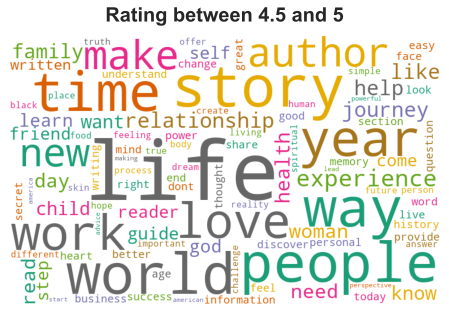

In [99]:
plt.rcParams["figure.figsize"] = [8, 5]
plt.rcParams["figure.dpi"] = 300

word_cloud.generate(by_rating.clean_summary[4])
plt.imshow(word_cloud, interpolation="bilinear")
plt.axis("off");
plt.title("Rating between 4.5 and 5", weight="bold", fontsize=20, y=1.03)
plt.show();